[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


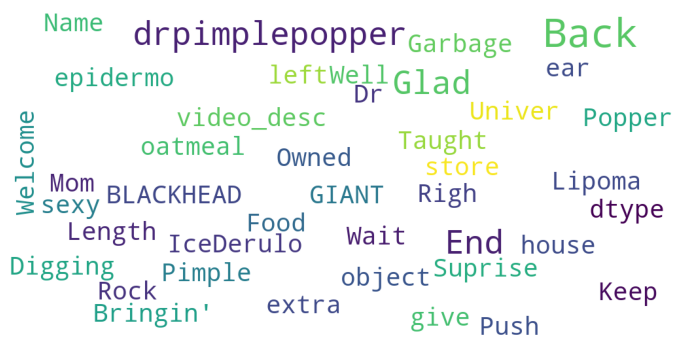

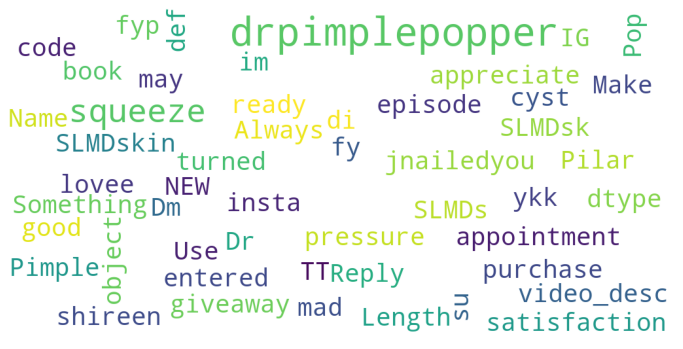



Training set has 6253 samples.
Testing set has 2680 samples.


Random Forest
Accuracy in %:
87.94776119402985
F1 Score
0.2838137472283814




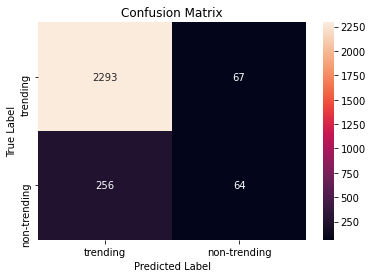

Train accuracy:  0.9681752758675836
mse test data:  0.12052238805970149
mse train data:  0.03182472413241644





In [2]:
#Rondom Forest
from __future__ import print_function
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import f1_score,accuracy_score
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from scipy.stats import sem
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import nltk
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer
import pickle
from pathlib import Path
import torch 
from sklearn.externals import joblib



data = pd.read_csv("DataWithTrending.csv")
nltk.download('stopwords')
stopset = set(stopwords.words("english"))




import nltk
nltk.download('wordnet')


# Wordcloud paramters
wc_height, wc_width = (512, 1024)
wc_bckp_color = 'white'
wc_max_words = 400
wc_max_font_size = 60
random_state = 42
wc_figsize = (12, 10)


trending_df = data.loc[data['trending'] == 1]

# Creating wordcloud for trending
trending_wc = WordCloud(
    height=wc_height, width=wc_width, background_color=wc_bckp_color,
    max_words=wc_max_words, max_font_size=wc_max_font_size,
    random_state=random_state
).generate(str(trending_df['video_desc']))

# Display the wordcloud
fig = plt.figure(figsize=wc_figsize)
plt.imshow(trending_wc)
plt.axis('off')
plt.show()

Nontrending_df = data.loc[data['trending'] == 0]

# Creating wordcloud for Nontrending
Nontrending_wc = WordCloud(
    height=wc_height, width=wc_width, background_color=wc_bckp_color,
    max_words=wc_max_words, max_font_size=wc_max_font_size,
    random_state=random_state
).generate(str(Nontrending_df['video_desc']))

# Display the wordcloud
fig = plt.figure(figsize=wc_figsize)
plt.imshow(Nontrending_wc)
plt.axis('off')
plt.show()

#Convert the description into vector
vectorizer = CountVectorizer(stop_words=stopset,binary=True)
    
X = vectorizer.fit_transform(data['video_desc'].values.astype('U'))
y = data.trending



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, train_size=0.70, random_state=None)

# Show the results of the split
print("\n")
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))
print("\n")

def train_classifier(clf, X_train, y_train):    
    clf.fit(X_train, y_train)
   
def predict_labels(clf, features):
    return(clf.predict(features))

A = RandomForestClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=None)



clf=[A]
acc_score = [0,0,0,0]
accuracy = [0,0,0,0]


for a in range(0,1):
    print("Random Forest")
    train_classifier(clf[a], X_train, y_train)
    y_pred = predict_labels(clf[a],X_test)
    

    pred_val = f1_score(y_test, y_pred)
  
   
    acc_score[a]=accuracy_score(y_test, y_pred, normalize=True, sample_weight=None)
    print("Accuracy in %:")
    print(acc_score[a]*100)
    print("F1 Score")
    print(pred_val)
    print("\n")
    cm = confusion_matrix(y_test, y_pred)
    class_label = ["trending", "non-trending"]
    df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
    sns.heatmap(df_cm, annot=True, fmt='d')
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()
    print("Train accuracy: ", clf[a].fit(X_train, y_train).score(X_train, y_train))
    print("mse test data: ",mean_squared_error(y_test, y_pred))
    y_train_pred = predict_labels(clf[a],X_train)
    print("mse train data: ",mean_squared_error(y_train, y_train_pred))
    print("\n\n")

  

 

   
